In [1]:
import pandas as pd
import matplotlib.pyplot as plt
file_path= r"C:\Users\HARRISON\Documents/owid-covid-data.csv"
df=pd.read_csv(file_path)
print(df.head())
print(df.columns)
print(df.isnull().sum())
print(df.columns)

  iso_code continent     location        date  total_cases  new_cases  \
0      AFG      Asia  Afghanistan  2020-01-05          0.0        0.0   
1      AFG      Asia  Afghanistan  2020-01-06          0.0        0.0   
2      AFG      Asia  Afghanistan  2020-01-07          0.0        0.0   
3      AFG      Asia  Afghanistan  2020-01-08          0.0        0.0   
4      AFG      Asia  Afghanistan  2020-01-09          0.0        0.0   

   new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  ...  \
0                 NaN           0.0         0.0                  NaN  ...   
1                 NaN           0.0         0.0                  NaN  ...   
2                 NaN           0.0         0.0                  NaN  ...   
3                 NaN           0.0         0.0                  NaN  ...   
4                 NaN           0.0         0.0                  NaN  ...   

   male_smokers  handwashing_facilities  hospital_beds_per_thousand  \
0           NaN            

Step Two :Here we will do Data Cleaning using Panda.

In [2]:
countries= ['Kenya', 'United States', 'India']
df_selected = df[df['location'].isin(countries)]
df_selected = df_selected.dropna(subset=['date', 'total_cases'])
df_selected['date'] = pd.to_datetime(df_selected['date'])
df_selected = df_selected.fillna(method='ffill')
print(df_selected.head())


C:\Users\HARRISON\AppData\Local\Temp\ipykernel_15944\812817186.py:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_selected = df_selected.fillna(method='ffill')


       iso_code continent location       date  total_cases  new_cases  \
173549      IND      Asia    India 2020-01-05          0.0        0.0   
173550      IND      Asia    India 2020-01-06          0.0        0.0   
173551      IND      Asia    India 2020-01-07          0.0        0.0   
173552      IND      Asia    India 2020-01-08          0.0        0.0   
173553      IND      Asia    India 2020-01-09          0.0        0.0   

        new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  \
173549                 NaN           0.0         0.0                  NaN   
173550                 NaN           0.0         0.0                  NaN   
173551                 NaN           0.0         0.0                  NaN   
173552                 NaN           0.0         0.0                  NaN   
173553                 NaN           0.0         0.0                  NaN   

        ...  male_smokers  handwashing_facilities  hospital_beds_per_thousand  \
173549  ...      

We have filtered the data so we can have Kenya, United States and India to be the locations.
Date have been formated so that we can read it ad date instead of a string.
We have also filled the empty space set using fillna()

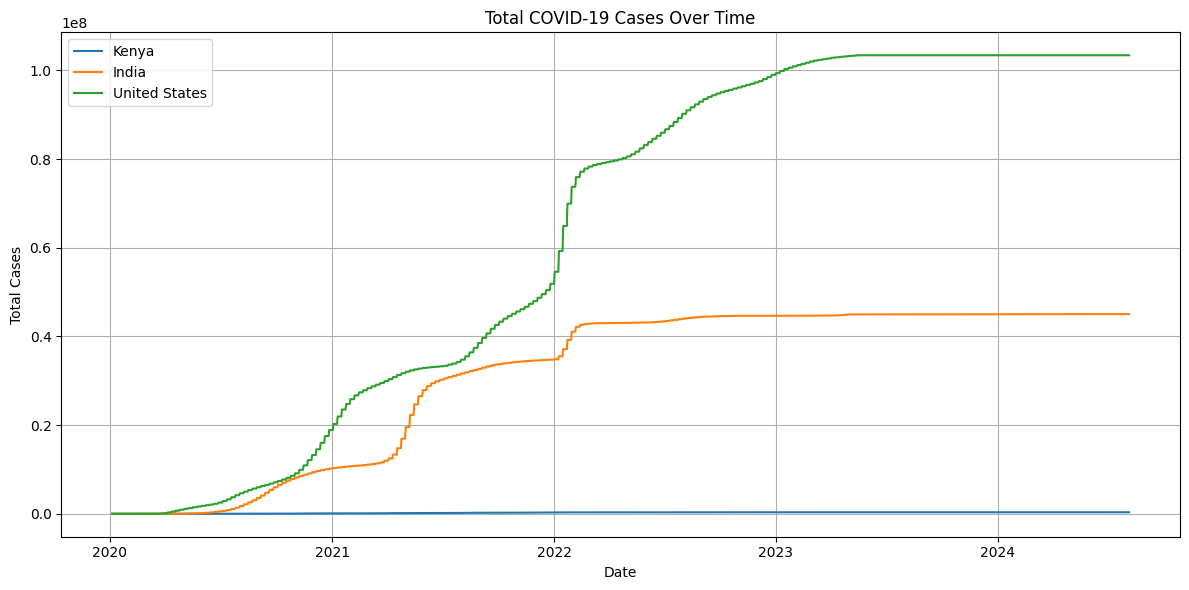

In [3]:
#Step Four:   Step 4: Exploratory Data Analysis (EDA)
#Importing and Installing the seaborn
import matplotlib.pyplot as plt
import seaborn as sns
#Trend of Total Cases in the selected countries over time.

plt.figure(figsize=(12, 6))
for country in ['Kenya', 'India', 'United States']:
    country_data = df_selected[df_selected['location'] == country]
    plt.plot(country_data['date'], country_data['total_cases'], label=country)

plt.title('Total COVID-19 Cases Over Time')
plt.xlabel('Date')
plt.ylabel('Total Cases')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



From the chart, we can see that in the United States and India, the cases increased over time, while in Kenya, the cases remained constant throughout all the years.

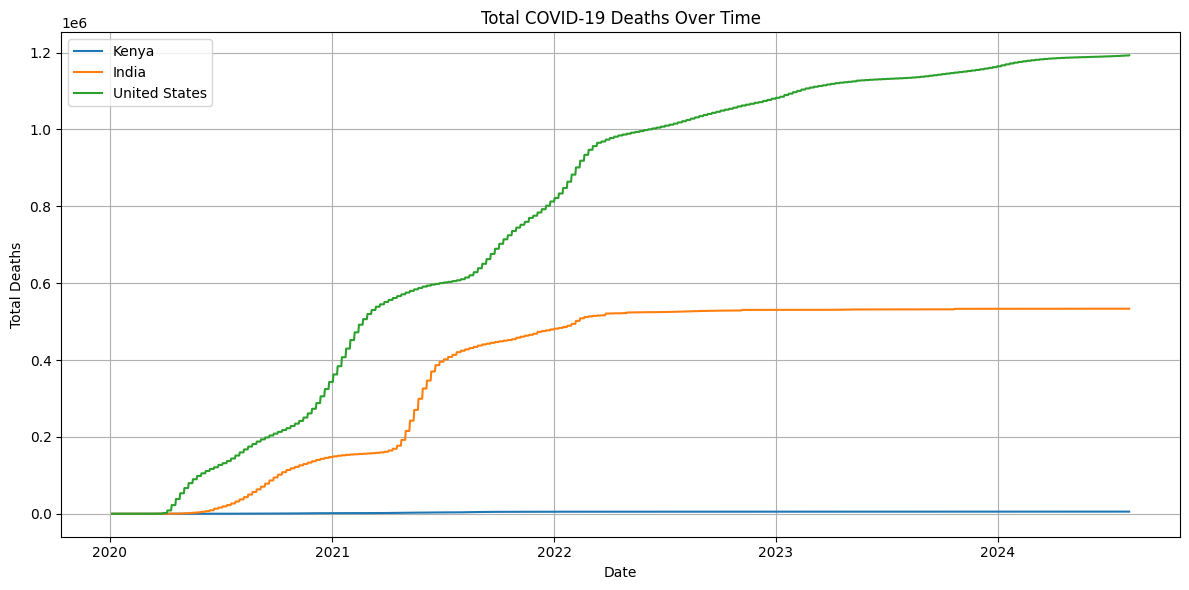

In [4]:
#Total Deaths Overtime
plt.figure(figsize=(12, 6))
for country in ['Kenya', 'India', 'United States']:
    country_data = df_selected[df_selected['location'] == country]
    plt.plot(country_data['date'], country_data['total_deaths'], label=country)

plt.title('Total COVID-19 Deaths Over Time')
plt.xlabel('Date')
plt.ylabel('Total Deaths')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

From the chart, we can conclude that the number of deaths in the United States and India increased over time, while in Kenya, the deaths remained constant throughout the years. In 2024, the death rate was slightly higher for all countries except Kenya, where it remained constant

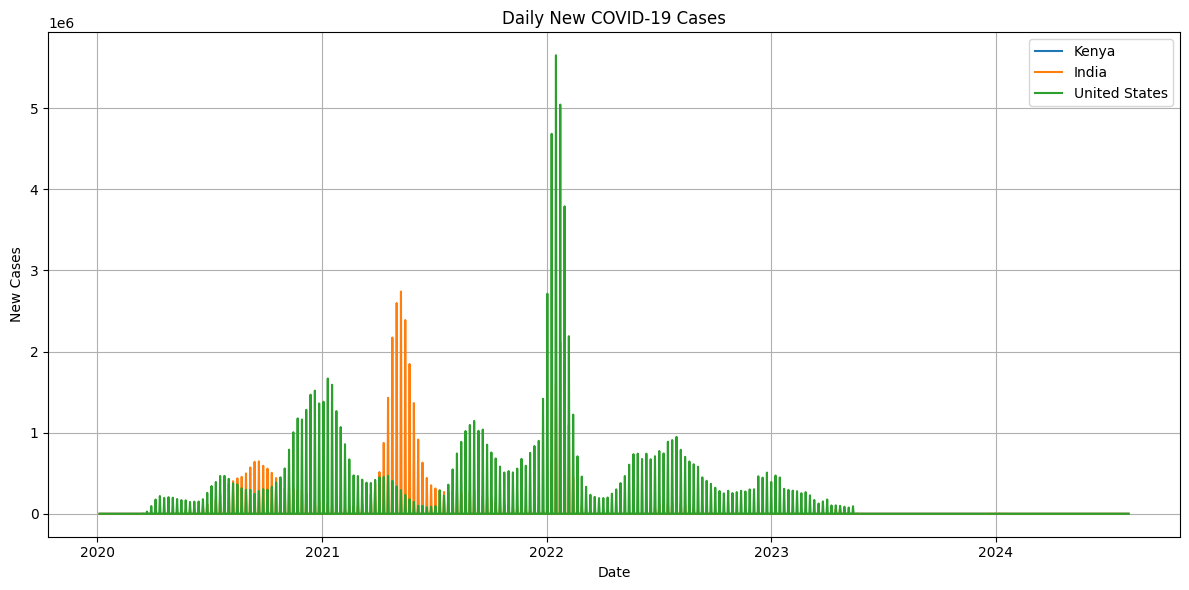

In [5]:
# Visual: New daily cases by country
plt.figure(figsize=(12, 6))
for country in ['Kenya', 'India', 'United States']:
    country_data = df_selected[df_selected['location'] == country]
    plt.plot(country_data['date'], country_data['new_cases'], label=country)

plt.title('Daily New COVID-19 Cases')
plt.xlabel('Date')
plt.ylabel('New Cases')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

The United States had consistently high daily cases overall. However, in India, cases spiked in the second quarter of 2021, while in 2020, they were higher in the third quarter of the year. 
Kenya had the lowest number of cases among the three throughout the years.

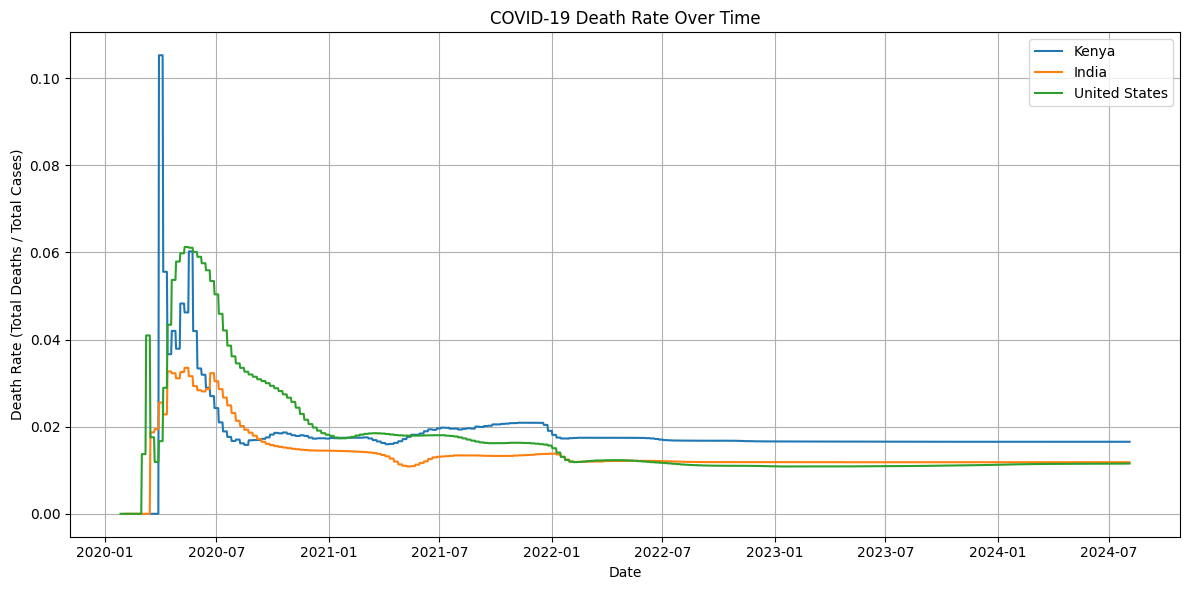

In [6]:
df_selected['death_rate'] = df_selected['total_deaths'] / df_selected['total_cases']

# Plot: Death rate over time
plt.figure(figsize=(12, 6))
for country in ['Kenya', 'India', 'United States']:
    country_data = df_selected[df_selected['location'] == country]
    plt.plot(country_data['date'], country_data['death_rate'], label=country)

plt.title('COVID-19 Death Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Death Rate (Total Deaths / Total Cases)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

From the chart, we can see that the death rate was high in all three countries, with the United States having the highest, followed by India, and Kenya having the lowest. The graph also shows that the rate was higher in 2020 compared to the other years, with the first half of the year recording the highest numbers.

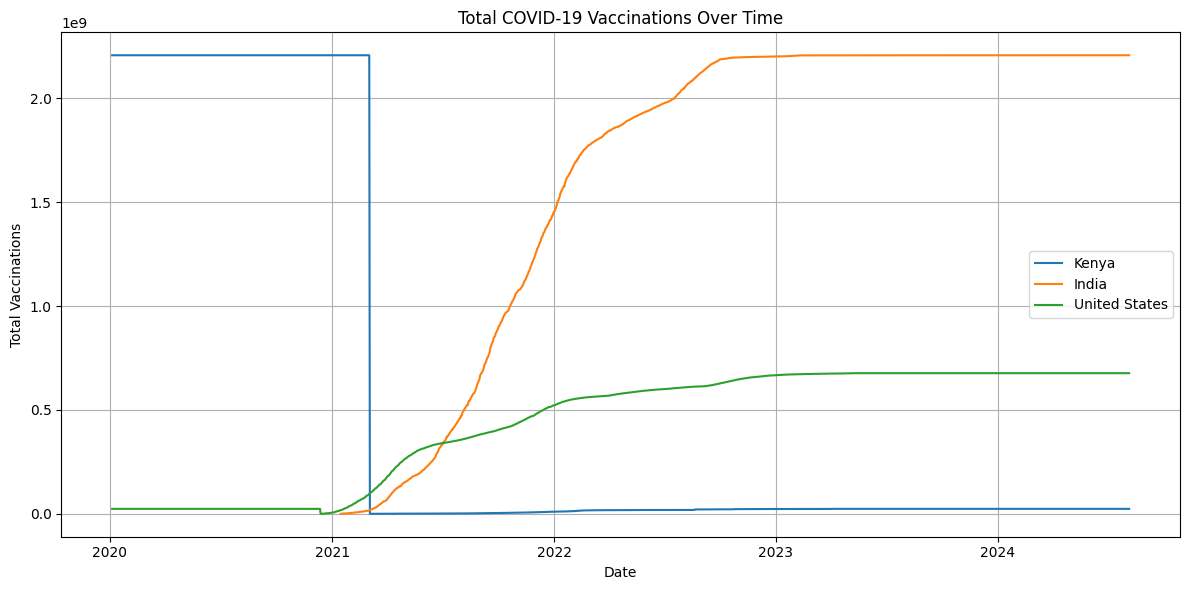

In [7]:
#STEP FIVE: Total vaccination over Time

plt.figure(figsize=(12, 6))
for country in ['Kenya', 'India', 'United States']:
    country_data = df_selected[df_selected['location'] == country]
    plt.plot(country_data['date'], country_data['total_vaccinations'], label=country)

plt.title('Total COVID-19 Vaccinations Over Time')
plt.xlabel('Date')
plt.ylabel('Total Vaccinations')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

By 2022, India had vaccinated over 2 billion times
in USA the Vaccinations were slower than India, but still steadily increasing up to about 700 million doses.
We have abrnomal chart in Kenya beacuse of fillna().

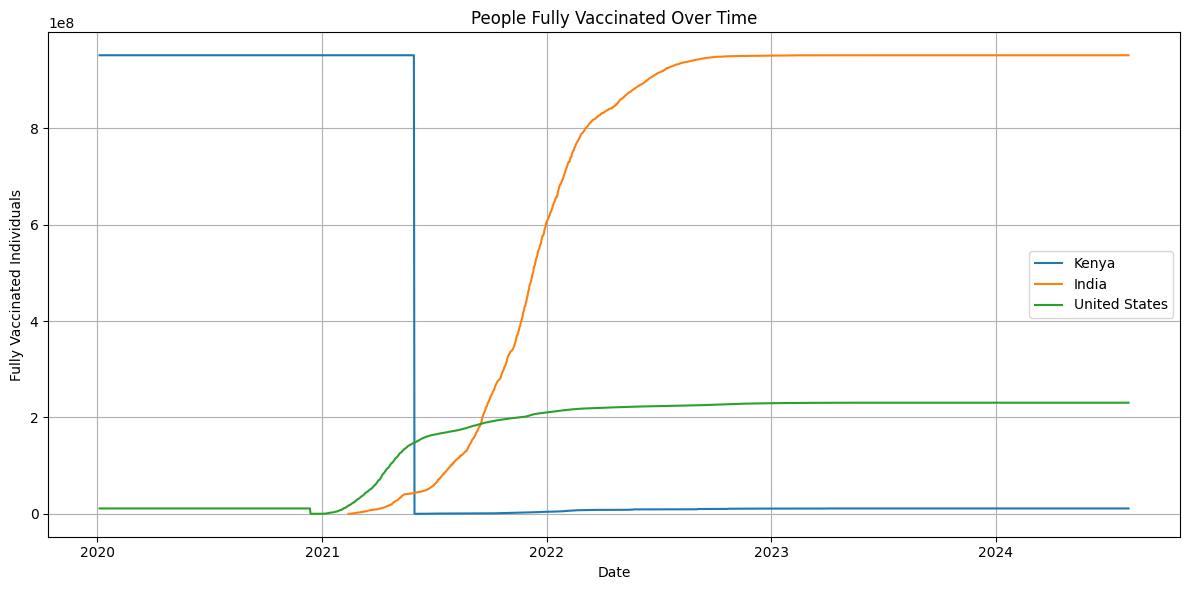

In [8]:
#People Fully Vaccinated Over Time
plt.figure(figsize=(12, 6))
for country in ['Kenya', 'India', 'United States']:
    country_data = df_selected[df_selected['location'] == country]
    plt.plot(country_data['date'], country_data['people_fully_vaccinated'], label=country)

plt.title('People Fully Vaccinated Over Time')
plt.xlabel('Date')
plt.ylabel('Fully Vaccinated Individuals')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In India, vaccination started in early 2021 and showed a sharp increase throughout 2021 and early 2022. In the United States, it started earlier, in 2020, and grew rapidly through early 2021, reaching about 30 million fully vaccinated individuals. For Kenya, there appears to be a serious data issue.

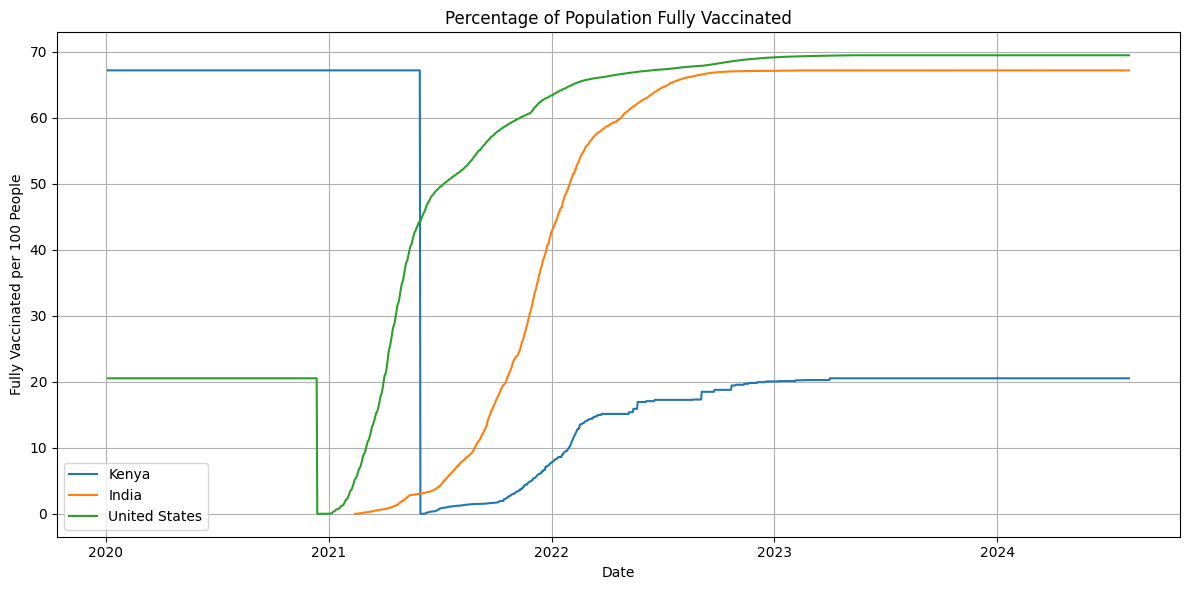

In [9]:
#Vaccination Percentage of Population

plt.figure(figsize=(12, 6))
for country in ['Kenya', 'India', 'United States']:
    country_data = df_selected[df_selected['location'] == country]
    plt.plot(country_data['date'], country_data['people_fully_vaccinated_per_hundred'], label=country)

plt.title('Percentage of Population Fully Vaccinated')
plt.xlabel('Date')
plt.ylabel('Fully Vaccinated per 100 People')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

U.S. led in early vaccine rollout and reached high coverage quickly.

India had a delayed start but achieved strong uptake throughout 2021.

Kenya shows evidence of serious data inconsistencies and low final coverage, highlighting issues with data collection or reporting

In [11]:
#STEP 6: Choropleth Map
import plotly.express as px

# Filter data for the latest date
latest_date = df_selected['date'].max()
df_latest = df_selected[df_selected['date'] == latest_date]

# Create choropleth map
fig = px.choropleth(
    df_latest,
    locations='iso_code',  # ISO Alpha-3 codes for countries
    color='people_fully_vaccinated_per_hundred',  # vaccination metric
    hover_name='location',  # country names for hover info
    color_continuous_scale='Greens',
    title=f'Percentage of Population Fully Vaccinated as of {latest_date}',
    labels={'people_fully_vaccinated_per_hundred': 'Fully Vaccinated per 100 People'}
)


fig.show(renderer="browser")